In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

from rDEP import DEP, EnsembleTransform, decision_boundary
from morph import SLMP, SLMPbox, MLMP
import morphological_dense_network as MDN
from extreme_learning_machine import HLM_ELM

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

plt.rcParams["figure.figsize"] = (8,6)

## Load double-moon dataset

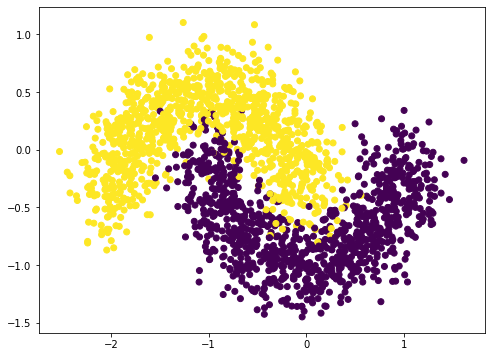

In [3]:
Xtr, ytr = datasets.make_moons(n_samples=2000, noise=.2, random_state=1)
Xte, yte = datasets.make_moons(n_samples=2000, noise=.2, random_state=3)
Xtr = -Xtr
Xte = -Xte
dataset = "Double-Moon"
plt.scatter(Xtr[:,0], Xtr[:,1], c=ytr)

### Perceptron Morfológico de Camada Única (SLMP)

Accuracies:
	Training: 0.66,
	Test: 0.66


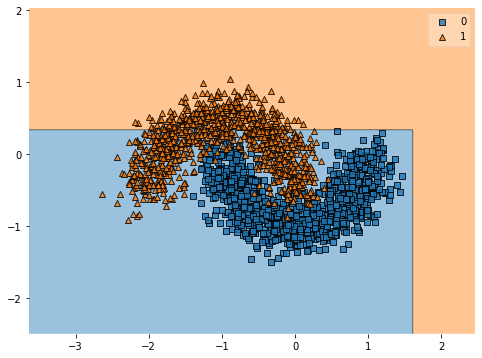

In [4]:
slmp = SLMP()
slmp.fit(Xtr, ytr)
print("Accuracies:\n\tTraining: %2.2f,\n\tTest: %2.2f" % (slmp.score(Xtr,ytr),slmp.score(Xte,yte)))
plt.figure()
plot_decision_regions(Xte, yte, slmp)
plt.savefig("Figures/SLMP.png",bbox_inches="tight")
plt.show()

### Perceptron Morfológico de Camada Única com Hiper-Caixas (SLMP-box) 

Accuracies:
	Training: 0.79,
	Test: 0.80


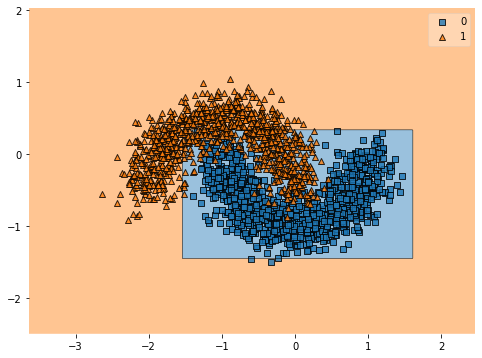

In [5]:
clf = SLMPbox()
clf.fit(Xtr, ytr)
print("Accuracies:\n\tTraining: %2.2f,\n\tTest: %2.2f" % (clf.score(Xtr,ytr),clf.score(Xte,yte)))
plt.figure()
plot_decision_regions(Xte, yte, clf)
plt.savefig("Figures/SLMPBox.png",bbox_inches="tight")
plt.show()

### Perceptron Morfológico com Camada Competitiva (MLMP) 

Accuracies:
	Training: 0.97,
	Test: 0.97


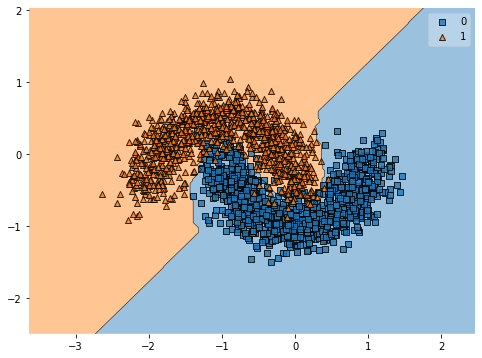

In [6]:
clf = MLMP()
clf.fit(Xtr, ytr)
print("Accuracies:\n\tTraining: %2.2f,\n\tTest: %2.2f" % (clf.score(Xtr,ytr),clf.score(Xte,yte)))
plt.figure()
plot_decision_regions(Xte, yte, clf)
plt.savefig("Figures/MLMP.png",bbox_inches="tight")
plt.show()

### Rede Morfológica Densa (MDN)

Epoch 1/50
63/63 [==============================] - 0s 6ms/step - loss: 0.5879 - accuracy: 0.7405
Epoch 2/50
63/63 [==============================] - 0s 6ms/step - loss: 0.4713 - accuracy: 0.8195
Epoch 3/50
63/63 [==============================] - 0s 5ms/step - loss: 0.4440 - accuracy: 0.8215
Epoch 4/50
63/63 [==============================] - 0s 5ms/step - loss: 0.4356 - accuracy: 0.8225
Epoch 5/50
63/63 [==============================] - 0s 5ms/step - loss: 0.4314 - accuracy: 0.8215
Epoch 6/50
63/63 [==============================] - 0s 5ms/step - loss: 0.4217 - accuracy: 0.8265
Epoch 7/50
63/63 [==============================] - 0s 5ms/step - loss: 0.4132 - accuracy: 0.8230
Epoch 8/50
63/63 [==============================] - 0s 5ms/step - loss: 0.4019 - accuracy: 0.8280
Epoch 9/50
63/63 [==============================] - 0s 5ms/step - loss: 0.3911 - accuracy: 0.8310
Epoch 10/50
63/63 [==============================] - 0s 5ms/step - loss: 0.3746 - accuracy: 0.8335
Epoch 11/50
63/63 [

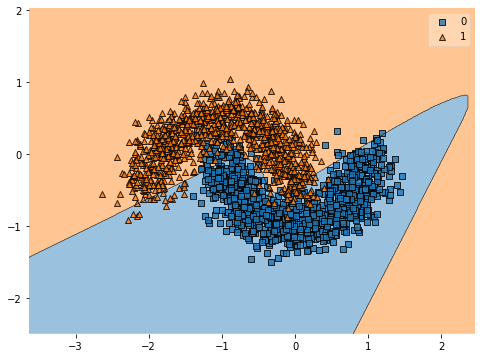

In [7]:
clf = MDN.MorphDense()
clf.fit(Xtr, ytr)
print("Accuracies:\n\tTraining: %2.2f,\n\tTest: %2.2f" % (clf.score(Xtr,ytr),clf.score(Xte,yte)))
plt.figure()
plot_decision_regions(Xte, yte, clf)
plt.savefig("Figures/MDN.png",bbox_inches="tight")
plt.show()

### Perceptron Erosão-Dilatação, com otimização convexo-côncavo (DEP)

m =  ['2.99', '0.40']
w =  ['0.67', '-2.62']
beta = 0.00
Accuracies:
	 Training: 0.82,
	 Test: 0.81


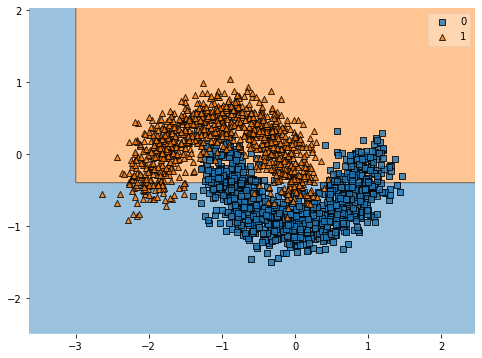

In [8]:
rede = DEP()
rede.fit(Xtr,ytr)
print("m = ",["%2.2f" % value for value in rede.ero_])
print("w = ",["%2.2f" % value for value in rede.dil_])
print("beta = %2.2f" % rede.beta)
print("Accuracies:\n\t Training: %2.2f,\n\t Test: %2.2f" % (rede.score(Xtr,ytr),rede.score(Xte,yte)))
# rede.show(Xte,yte,Nh=501)
plot_decision_regions(Xte, yte, rede)
plt.savefig("Figures/DEP-072.png",dpi=300,bbox_inches="tight")
plt.show()

### Máquina de Aprendizado Extremo Híbrida Morfológico/Linear (HLM_ELM)

Accuracies:
	Training: 0.97,
	Test: 0.97


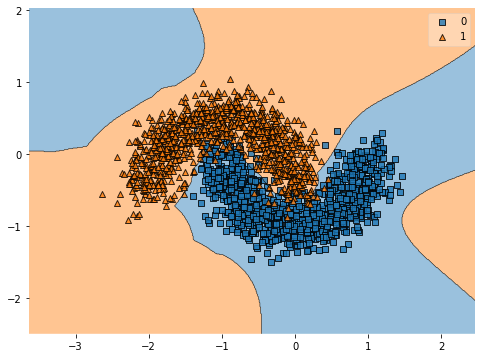

In [9]:
clf = HLM_ELM()
clf.fit(Xtr, ytr)
print("Accuracies:\n\tTraining: %2.2f,\n\tTest: %2.2f" % (clf.score(Xtr,ytr),clf.score(Xte,yte)))
plt.figure()
plot_decision_regions(Xte, yte, clf)
plt.savefig("Figures/HLM_ELM.png",bbox_inches="tight")
plt.show()

### Máquina de Suporte Vetorial para Classificação (SVC)

Accuracies:
	 Training: 0.87,
	 Test: 0.87


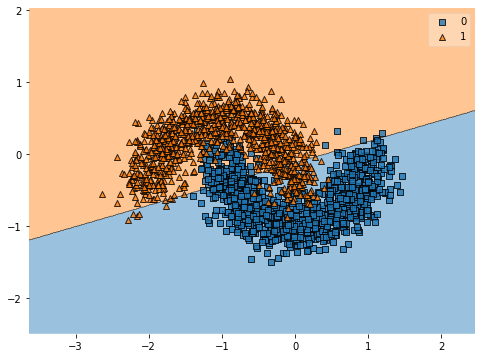

In [10]:
svc1 = SVC(kernel='linear')
svc1.fit(Xtr,ytr)
plot_decision_regions(Xte,yte, svc1)
print("Accuracies:\n\t Training: %2.2f,\n\t Test: %2.2f" % (svc1.score(Xtr,ytr),svc1.score(Xte,yte)))
plt.savefig('Figures/svc-linear.png')

Accuracies:
	 Training: 0.97,
	 Test: 0.97


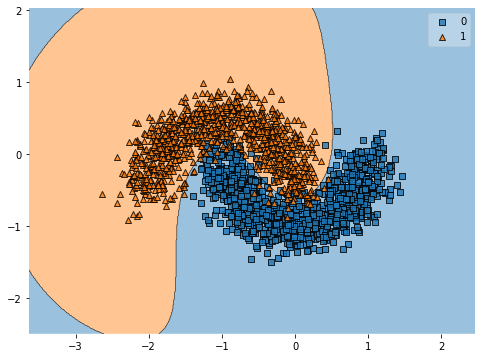

In [11]:
svc2 = SVC(kernel='rbf')
svc2.fit(Xtr,ytr)
plot_decision_regions(Xte,yte, svc2)
print("Accuracies:\n\t Training: %2.2f,\n\t Test: %2.2f" % (svc2.score(Xtr,ytr),svc2.score(Xte,yte)))
plt.savefig('Figures/svc-rbf.png')

Accuracies:
	 Training: 0.90,
	 Test: 0.90


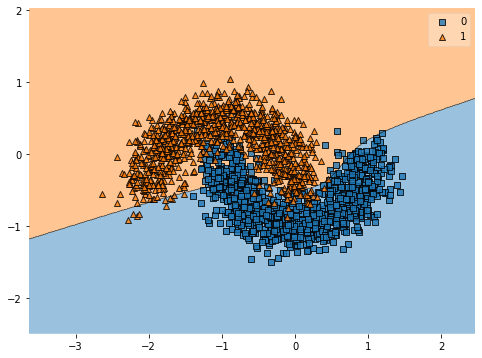

In [12]:
svc3 = SVC(kernel='poly')
svc3.fit(Xtr,ytr)
plot_decision_regions(Xte,yte, svc3)
print("Accuracies:\n\t Training: %2.2f,\n\t Test: %2.2f" % (svc3.score(Xtr,ytr),svc3.score(Xte,yte)))

### Reduced Dilation-Erosion Perceptron (Ensemble - Linear and RBF SVC)

(2000, 2)
m =  ['0.58', '0.84']
w =  ['-0.76', '-1.01']
beta = 0.43
Accuracies:
	 Training: 0.96,
	 Test: 0.95


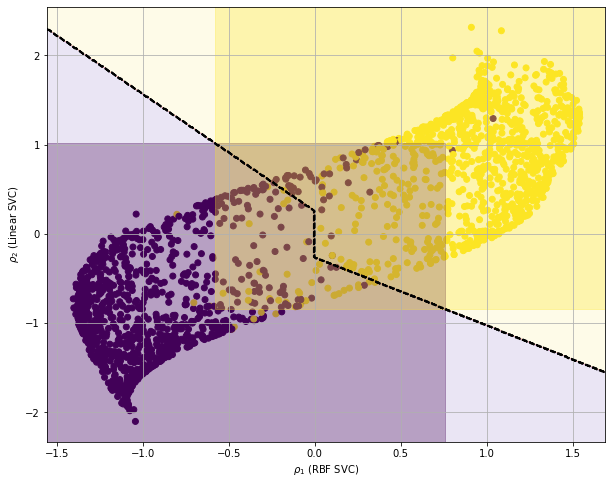

In [13]:
VotingSVC = VotingClassifier([("RBF SVC",SVC(kernel='rbf', gamma="scale")),
             ("Linear SVC",SVC(kernel="linear"))])
VotingSVC.fit(Xtr,ytr)

svcTransform = make_pipeline(EnsembleTransform(VotingSVC),StandardScaler())
svcTransform.fit(Xtr,ytr)

rhoXtr = svcTransform.transform(Xtr)
print(rhoXtr.shape)
rhoXte = svcTransform.transform(Xte)

rede = DEP()
rede.fit(rhoXtr,ytr)
print("m = ",["%2.2f" % value for value in rede.ero_])
print("w = ",["%2.2f" % value for value in rede.dil_])
print("beta = %2.2f" % rede.beta)
print("Accuracies:\n\t Training: %2.2f,\n\t Test: %2.2f" % (rede.score(rhoXtr,ytr),rede.score(rhoXte,yte)))
rede.show(rhoXtr,ytr,Nh=501)
plt.xlabel(r"$\rho_1$ (RBF SVC)")
plt.ylabel(r"$\rho_2$ (Linear SVC)");
# plt.savefig("Figures/rho-DEP-Ensemble-%s.pdf" % dataset,dpi=300,bbox_inches="tight")

r-DEP -- Training: 0.96,	 Test: 0.95
RBF SVC -- Training: 0.97,	 Test: 0.97
Linear SVC -- Training: 0.87,	 Test: 0.87
Voting SVC -- Training: 0.92,	 Test: 0.92


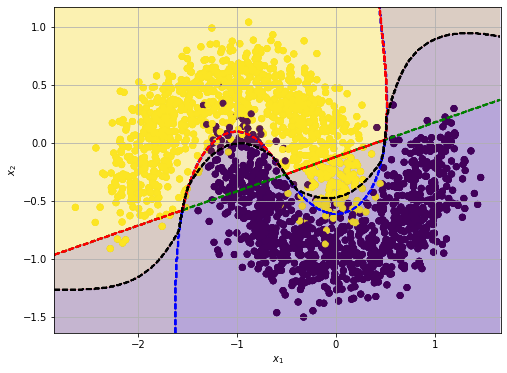

In [14]:
rede_rho = make_pipeline(svcTransform,rede)
# # print(rede_rho)
decision_boundary(VotingSVC.estimators_[0],Xte,yte,Nh=501,colors="blue")
decision_boundary(VotingSVC.estimators_[1],Xte,yte,Nh=501,colors="green")
decision_boundary(VotingSVC,Xte,yte,Nh=501,colors="red")
decision_boundary(rede_rho,Xte,yte,Nh=501, colors='black')
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.savefig("Figures/r-DEP-Ensemble-%s.png" % dataset,dpi=300,bbox_inches="tight")

print("r-DEP -- Training: %2.2f,\t Test: %2.2f" % 
      (rede_rho.score(Xtr,ytr),rede_rho.score(Xte,yte)))
print("RBF SVC -- Training: %2.2f,\t Test: %2.2f" % 
      (VotingSVC.estimators_[0].score(Xtr,ytr),VotingSVC.estimators_[0].score(Xte,yte)))
print("Linear SVC -- Training: %2.2f,\t Test: %2.2f" % 
      (VotingSVC.estimators_[1].score(Xtr,ytr),VotingSVC.estimators_[1].score(Xte,yte)))
print("Voting SVC -- Training: %2.2f,\t Test: %2.2f" % 
      (VotingSVC.score(Xtr,ytr),VotingSVC.score(Xte,yte)))
# VotingSVC.decision_function(Xtr)

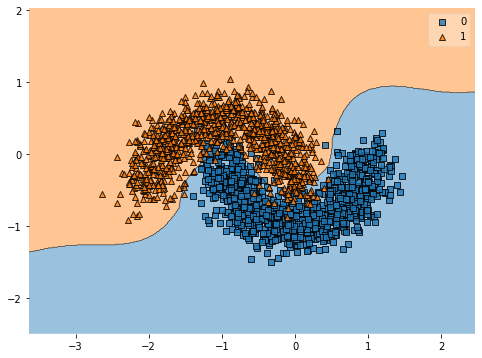

In [15]:
plot_decision_regions(Xte, yte, rede_rho)
# decision_boundary(rede,Zte,yte,Nh=501, colors='black')
plt.savefig('Figures/rDEP-ensemble.png', bbox_inches = "tight")

### Reduced Dilation-Erosion Perceptron (Bagging - RBF SVC)

m =  ['0.82', '0.82']
w =  ['-0.83', '-1.34']
beta = 0.50
Accuracies:
	 Training: 0.971,
	 Test: 0.968


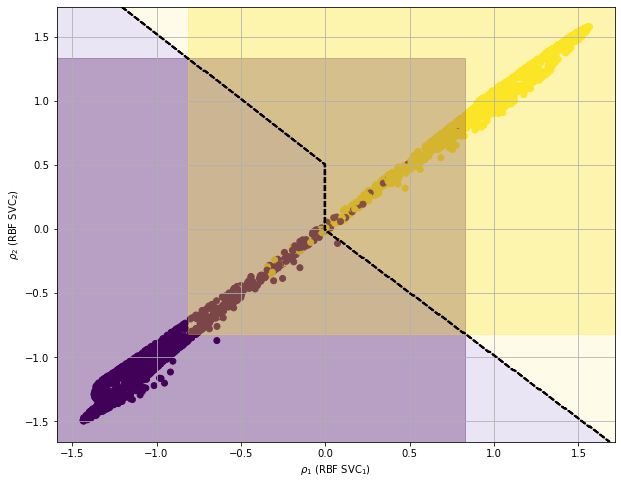

In [16]:
BaggingSVC = BaggingClassifier(base_estimator=SVC(gamma="scale"),
                               n_estimators=2,random_state=0)
BaggingSVC.fit(Xtr,ytr)

svcTransform = make_pipeline(EnsembleTransform(BaggingSVC),StandardScaler())
svcTransform.fit(Xtr,ytr)

rhoXtr = svcTransform.transform(Xtr)
rhoXte = svcTransform.transform(Xte)

rede = DEP()
rede.fit(rhoXtr,ytr)
print("m = ",["%2.2f" % value for value in rede.ero_])
print("w = ",["%2.2f" % value for value in rede.dil_])
print("beta = %2.2f" % rede.beta)
print("Accuracies:\n\t Training: %2.3f,\n\t Test: %2.3f" % (rede.score(rhoXtr,ytr),rede.score(rhoXte,yte)))
rede.show(rhoXtr,ytr,Nh=501)
plt.xlabel(r"$\rho_1$ (RBF SVC$_1$)")
plt.ylabel(r"$\rho_2$ (RBF SVC$_2$)");
# plt.savefig("Figures/rho-DEP-Bagging-%s.pdf" % dataset,dpi=300,bbox_inches="tight")

r-DEP		-- Training: 0.97,	 Test: 0.97
RBF SVC (1) -- Training: 0.97,	 Test: 0.97
RBF SVC (2) -- Training: 0.97,	 Test: 0.97
Bagging SVC -- Training: 0.97,	 Test: 0.97


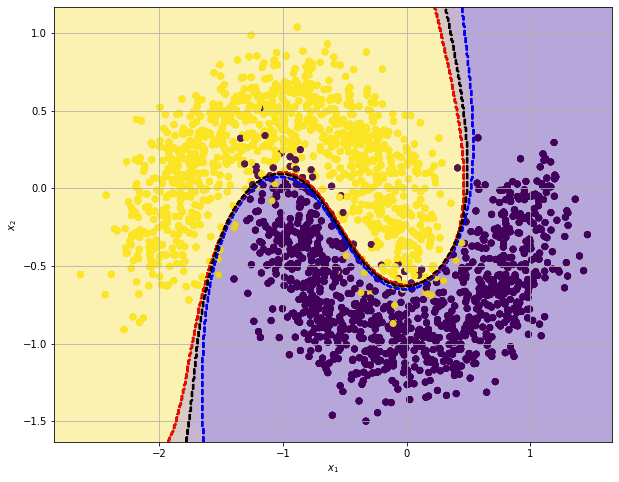

In [17]:
plt.figure(figsize=(10, 8))
rede_rho = make_pipeline(svcTransform,rede)
decision_boundary(BaggingSVC.estimators_[0],Xte,yte,Nh=501,colors="blue")
decision_boundary(BaggingSVC.estimators_[1],Xte,yte,Nh=501,colors="green")
decision_boundary(BaggingSVC,Xte,yte,Nh=501,colors="red")
decision_boundary(rede_rho,Xte,yte,Nh=501, colors="black")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.savefig("Figures/r-DEP-Bagging-%s.png" % dataset,dpi=300,bbox_inches="tight")

print("r-DEP\t\t-- Training: %2.2f,\t Test: %2.2f" % 
      (rede_rho.score(Xtr,ytr),rede_rho.score(Xte,yte)))
print("RBF SVC (1) -- Training: %2.2f,\t Test: %2.2f" % 
      (BaggingSVC.estimators_[0].score(Xtr,ytr),BaggingSVC.estimators_[0].score(Xte,yte)))
print("RBF SVC (2) -- Training: %2.2f,\t Test: %2.2f" % 
      (BaggingSVC.estimators_[1].score(Xtr,ytr),BaggingSVC.estimators_[1].score(Xte,yte)))
print("Bagging SVC -- Training: %2.2f,\t Test: %2.2f" % 
      (BaggingSVC.score(Xtr,ytr),BaggingSVC.score(Xte,yte)))

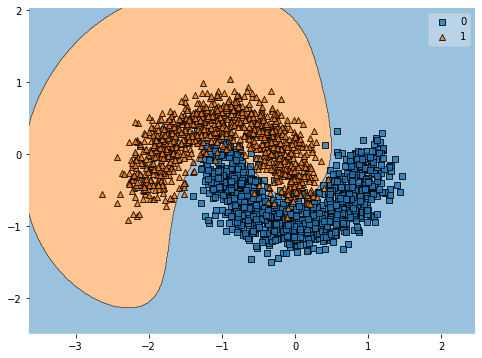

In [18]:
plot_decision_regions(Xte, yte, rede_rho)
# decision_boundary(rede,Zte,yte,Nh=501, colors='black')
# plt.savefig('rDEP-bagging.png')
plt.savefig('Figures/rDEP-bagging.png', bbox_inches = "tight")